Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date, datetime
sns.set(font_scale=2)
pd.set_option('display.max_rows', None)


Obtain the dataset

In [2]:
bp= pd.read_excel(r'./../data/20220426/bp_20220426.xlsx')
bp.head()

,patientID,systolic,diastolic,pulse,recordTime,notes,deviceID,unit
0,14487,142,77,69,2022-04-26 16:45:00,NaN,manual,mmHg
1,14536,114,50,55,2022-04-26 06:42:36,after morning walk for 45 mins. and before m...,manual,mmHg
2,14487,138,77,55,2022-04-26 05:40:00,NaN,manual,mmHg
3,14536,120,54,54,2022-04-25 20:05:53,after exercise and walking for one hour.,manual,mmHg
4,14487,133,81,84,2022-04-25 17:05:00,NaN,manual,mmHg


In [3]:
user = pd.read_excel(r'./../data/20220426/patient_20220426.xlsx')
user.head()

,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction
0,14677,NaN,NaN,NaN,Male,1946-03-21 00:00:00,180.0,cm,80.0,kg,Married,No,Indian,1.2,College/university completed
1,14645,NaN,NaN,NaN,Female,1966-06-29 00:00:00,155.0,cm,57.0,kg,NaN,No,NaN,0.0,NaN
2,14614,NaN,NaN,NaN,Female,1974-12-14 00:00:00,161.0,cm,78.5,kg,NaN,No,NaN,0.0,NaN
3,14593,NaN,NaN,NaN,Male,1985-03-30 00:00:00,168.0,cm,84.0,kg,Single,No,Chinese,1.2,College/university completed
4,14592,NaN,NaN,NaN,Female,1977-12-10 00:00:00,155.0,cm,57.0,kg,NaN,No,NaN,0.0,NaN


Remove Time from birthday ( a record with 1000-04-25 00:00:00 was found)

In [4]:
user['birthday']=pd.to_datetime(user['birthday'], errors = 'coerce')



In [5]:
user['birthday'] = pd.to_datetime(user['birthday']).dt.date

In [6]:
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  

In [7]:
user['age'] = user['birthday'].apply(age)

In [8]:
user

,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction,age
0,14677,NaN,NaN,NaN,Male,1946-03-21,180.0,cm,80.0,kg,Married,No,Indian,1.200,College/university completed,76.0
1,14645,NaN,NaN,NaN,Female,1966-06-29,155.0,cm,57.0,kg,NaN,No,NaN,0.000,NaN,56.0
2,14614,NaN,NaN,NaN,Female,1974-12-14,161.0,cm,78.5,kg,NaN,No,NaN,0.000,NaN,47.0
3,14593,NaN,NaN,NaN,Male,1985-03-30,168.0,cm,84.0,kg,Single,No,Chinese,1.200,College/university completed,37.0
4,14592,NaN,NaN,NaN,Female,1977-12-10,155.0,cm,57.0,kg,NaN,No,NaN,0.000,NaN,44.0
5,14589,NaN,NaN,NaN,Female,1953-07-11,155.0,cm,43.0,kg,NaN,No,NaN,0.000,NaN,69.0
6,14582,NaN,NaN,NaN,Female,1955-03-22,165.0,cm,86.0,kg,NaN,No,NaN,1.550,NaN,67.0
7,14570,NaN,NaN,NaN,Male,1956-03-19,157.0,cm,100.0,kg,NaN,No,NaN,0.000,NaN,66.0
8,14562,NaN,NaN,NaN,Male,1951-11-16,165.0,cm,80.0,kg,Married,No,Chinese,1.200,Primary school completed,70.0
9,14560,NaN,NaN,NaN,Male,1964-07-01,169.0,cm,82.0,kg,NaN,No,NaN,0.000,NaN,58.0


In [9]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   patientID   4070 non-null   int64         
 1   systolic    4070 non-null   int64         
 2   diastolic   4070 non-null   int64         
 3   pulse       4070 non-null   int64         
 4   recordTime  4070 non-null   datetime64[ns]
 5   notes       1108 non-null   object        
 6   deviceID    4070 non-null   object        
 7   unit        4070 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 254.5+ KB


In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientID    107 non-null    int64  
 1   firstName    0 non-null      float64
 2   lastName     0 non-null      float64
 3   email        0 non-null      float64
 4   gender       106 non-null    object 
 5   birthday     105 non-null    object 
 6   height       106 non-null    float64
 7   height_unit  107 non-null    object 
 8   weight       106 non-null    float64
 9   weight_unit  107 non-null    object 
 10  marital      48 non-null     object 
 11  smoking      107 non-null    object 
 12  race         52 non-null     object 
 13  life_style   107 non-null    float64
 14  Eduction     51 non-null     object 
 15  age          105 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 13.5+ KB


Missing values in the dataset

In [11]:
bp.isna().sum()

patientID        0
systolic         0
diastolic        0
pulse            0
recordTime       0
notes         2962
deviceID         0
unit             0
dtype: int64

In [12]:
user.isna().sum()

patientID        0
firstName      107
lastName       107
email          107
gender           1
birthday         2
height           1
height_unit      0
weight           1
weight_unit      0
marital         59
smoking          0
race            55
life_style       0
Eduction        56
age              2
dtype: int64

Structure of the dataset

In [13]:
bp.shape

(4070, 8)

In [14]:
user.shape

(107, 16)

Seperating numerical features in Blood Pressure dataset

In [15]:
num = ['systolic', 'diastolic','pulse']
time = ['recordDateTime']

In [16]:
bp[num].describe()

,systolic,diastolic,pulse
count,4070.000000,4070.000000,4070.000000
mean,132.770762,77.735135,74.554791
std,199.639537,13.189737,22.963996
min,59.000000,0.000000,0.000000
25%,119.000000,69.000000,65.000000
50%,129.000000,79.000000,73.000000
75%,138.000000,86.000000,83.000000
max,12822.000000,131.000000,779.000000


In [17]:
bp['deviceID'].value_counts()


manual     2974
B3 BT      1092
ROSSMAX       4
Name: deviceID, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


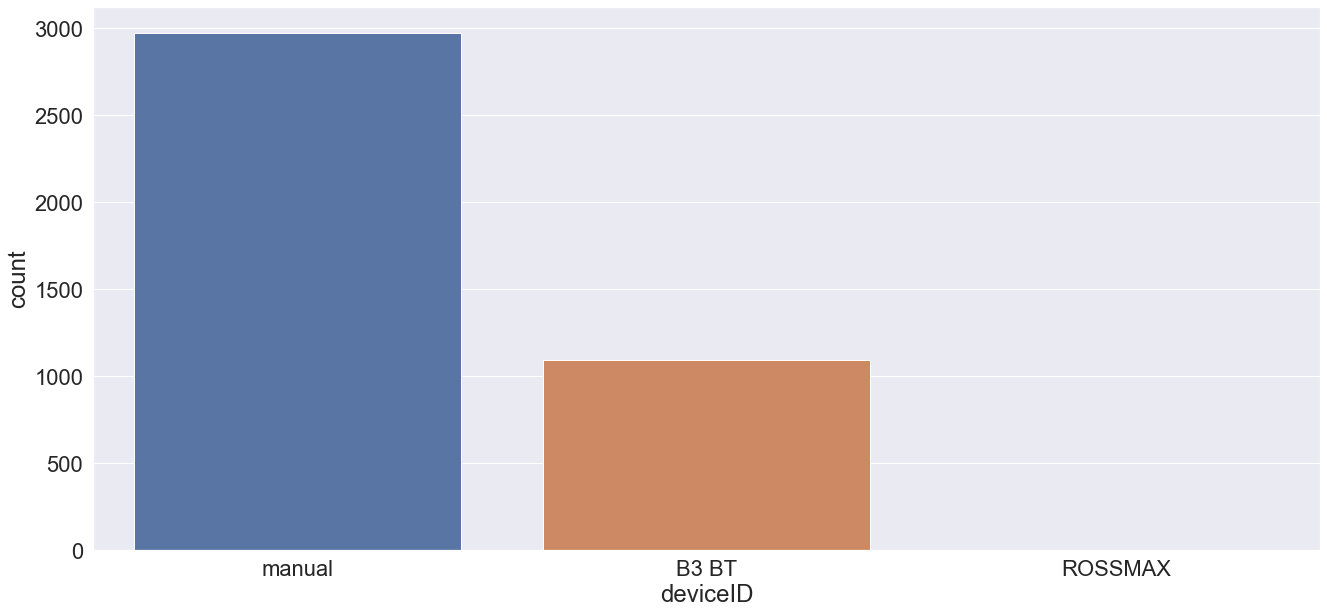

In [18]:
plt.figure(figsize=(22,10))
sns.countplot(bp['deviceID'])
plt.show()

In [19]:
bp['unit'].value_counts()


mmHg    4070
Name: unit, dtype: int64

Boxplot to detect outliers

<AxesSubplot:xlabel='systolic'>

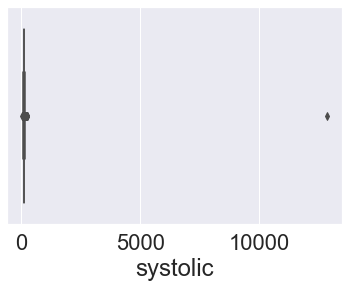

In [20]:
sns.boxplot(x=bp['systolic'])



<AxesSubplot:xlabel='diastolic'>

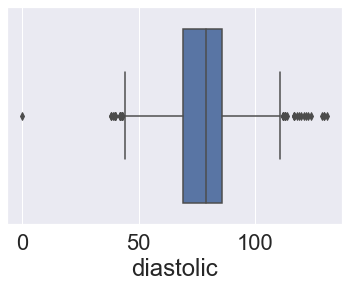

In [21]:
sns.boxplot(x=bp['diastolic'])


<AxesSubplot:xlabel='pulse'>

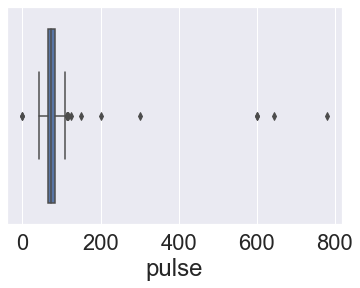

In [22]:
sns.boxplot(x=bp['pulse'])


Correlation

,systolic,diastolic,pulse
systolic,1.000000,0.027149,-0.002699
diastolic,0.027149,1.000000,0.330631
pulse,-0.002699,0.330631,1.000000


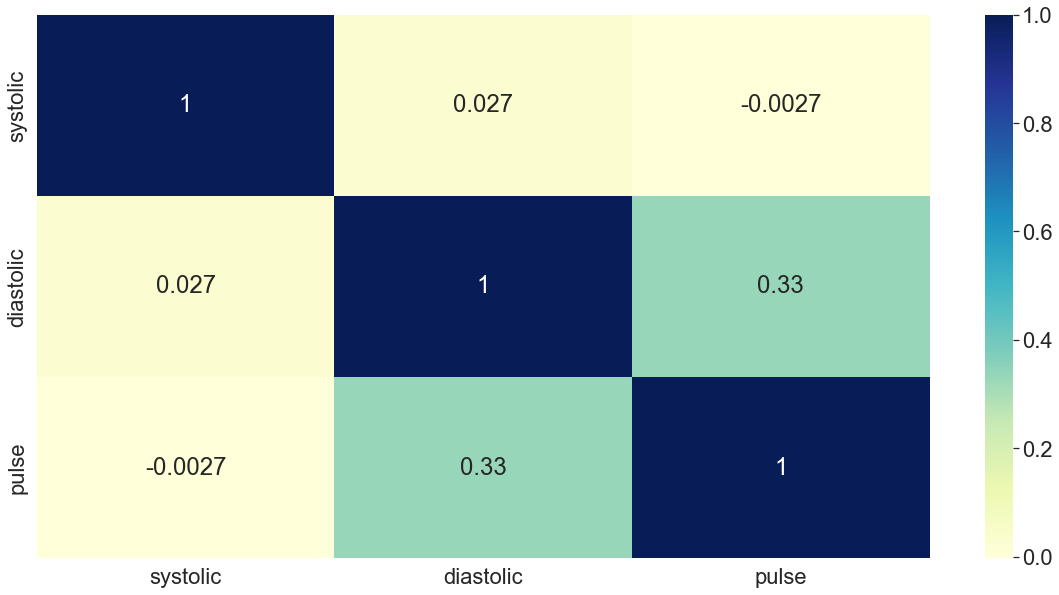

In [23]:
plt.figure(figsize=(20,10))
c= bp[num].corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)
c

In [24]:
bp

,patientID,systolic,diastolic,pulse,recordTime,notes,deviceID,unit
0,14487,142,77,69,2022-04-26 16:45:00,NaN,manual,mmHg
1,14536,114,50,55,2022-04-26 06:42:36,after morning walk for 45 mins. and before m...,manual,mmHg
2,14487,138,77,55,2022-04-26 05:40:00,NaN,manual,mmHg
3,14536,120,54,54,2022-04-25 20:05:53,after exercise and walking for one hour.,manual,mmHg
4,14487,133,81,84,2022-04-25 17:05:00,NaN,manual,mmHg
5,14536,114,38,49,2022-04-25 09:58:45,renal clinic ppum 2nd reading immediate.,manual,mmHg
6,14536,127,44,49,2022-04-25 09:56:19,renal clinic ppum,manual,mmHg
7,14536,98,40,54,2022-04-25 06:49:56,after exercise and walking for one hour.,manual,mmHg
8,14487,128,82,66,2022-04-25 06:00:00,NaN,manual,mmHg
9,14536,120,52,54,2022-04-24 20:09:43,after exercise and walking for 1 hour.,manual,mmHg


In [25]:
bp.groupby(['patientID'])[num].describe()
#print(bp.groupby(['patientID'])[num].describe().to_string())

systolic                                                         \
             count        mean          std    min     25%    50%     75%   
patientID                                                                   
14042        431.0  122.009281    14.370348   79.0  114.00  121.0  130.00   
14341         93.0  143.182796    25.871735  113.0  133.00  137.0  145.00   
14385         40.0  131.000000     6.850042  119.0  125.75  131.0  135.25   
14386         74.0  119.297297    10.629153   94.0  111.25  119.5  125.50   
14387          2.0  164.500000     0.707107  164.0  164.25  164.5  164.75   
14388         50.0  124.700000    12.367254   98.0  118.00  123.5  131.75   
14389          5.0  126.200000    10.281051  115.0  115.00  132.0  134.00   
14391         21.0  732.285714  2770.118195  110.0  122.00  130.0  135.00   
14392          2.0  150.000000     2.828427  148.0  149.00  150.0  151.00   
14393          2.0  136.000000    19.798990  122.0  129.00  136.0  143.00   
14395         32.0  128.781250     9.342012  112.0  122.75  128.0  132.50   
14398          9.0  122.555556    12.146101  111.0  115.00  115.0  127.00   
14403         51.0  133.196078     7.155472  122.0  128.50  133.0  137.00   
14404         15.0  116.800000     5.882176  104.0  113.00  117.0  121.00   
14407          5.0  127.800000    21.147104  114.0  116.00  120.0  124.00   
14409         14.0  122.571429     6.880455  113.0  117.25  123.5  125.00   
14412          5.0  129.600000     8.905055  115.0  128.00  132.0  136.00   
14413         15.0  147.733333    12.191722  130.0  136.50  150.0  154.00   
14414         50.0  117.680000     8.313844  107.0  111.00  115.5  122.75   
14425         17.0  135.294118    10.815294  122.0  131.00  134.0  137.00   
14426         22.0  121.909091     7.921695  106.0  116.50  120.5  127.00   
14432        249.0  118.120482    11.075326   96.0  109.00  117.0  128.00   
14435         19.0  124.684211     7.817734  113.0  119.00  124.0  127.00   
14441          2.0  106.500000    13.435029   97.0  101.75  106.5  111.25   
14442        148.0  135.574324    12.859307   92.0  129.00  136.0  144.00   
14443         92.0  115.782609     6.090573  101.0  112.00  116.0  119.25   
14444         44.0  142.363636    11.018148  122.0  136.75  141.0  148.00   
14445         37.0  157.891892    15.888122  130.0  146.00  161.0  168.00   
14448        106.0  136.320755    17.564329  102.0  120.75  137.0  148.00   
14449          1.0  129.000000          NaN  129.0  129.00  129.0  129.00   
14451         36.0  184.500000    20.379962  126.0  178.50  189.0  197.25   
14452          1.0  133.000000          NaN  133.0  133.00  133.0  133.00   
14454         36.0  146.555556    18.262287  110.0  134.50  149.5  158.00   
14455          7.0  146.000000     7.852813  135.0  140.00  148.0  151.00   
14457         13.0  127.153846    17.572925  104.0  115.00  121.0  145.00   
14461         56.0  112.285714    11.882323   91.0  106.75  110.0  117.00   
14468          1.0  135.000000          NaN  135.0  135.00  135.0  135.00   
14469          4.0  136.500000    12.124356  127.0  129.25  132.5  139.75   
14470          3.0  130.666667    12.741010  116.0  126.50  137.0  138.00   
14471          2.0  130.000000     1.414214  129.0  129.50  130.0  130.50   
14474         19.0  136.631579    13.212833  111.0  130.00  136.0  143.00   
14475         88.0  122.681818    11.415401   88.0  114.00  124.0  130.00   
14481         26.0  140.923077     7.919207  122.0  137.25  144.0  144.00   
14483         37.0  122.270270     6.366792  112.0  117.00  123.0  126.00   
14484          1.0  190.000000          NaN  190.0  190.00  190.0  190.00   
14485          7.0  128.571429     7.678045  119.0  122.50  128.0  134.50   
14487        301.0  139.986711    12.721366  114.0  134.00  139.0  143.00   
14488        114.0  136.008772     8.989173  113.0  129.00  136.5  141.00   
14489          4.0  166.750000    16.049403  144.0  161.25  172.0  177.50   
14492 

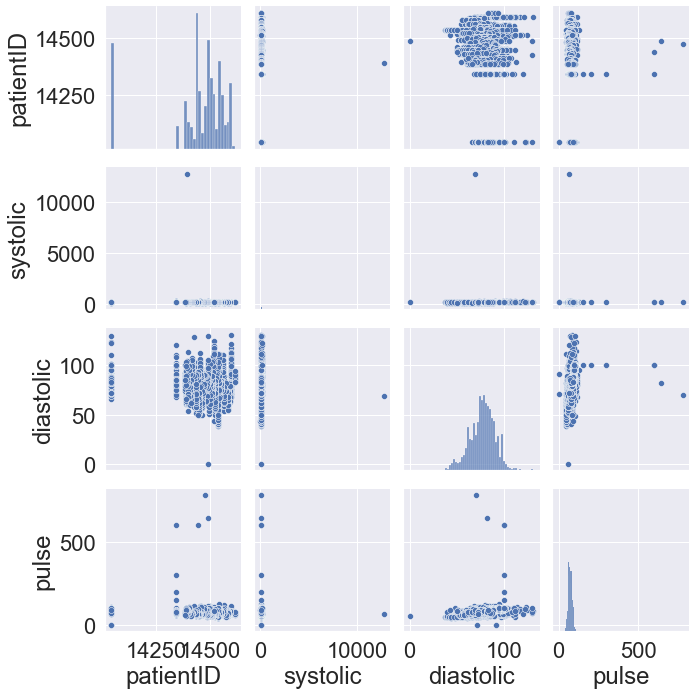

In [26]:
sns.pairplot(bp)

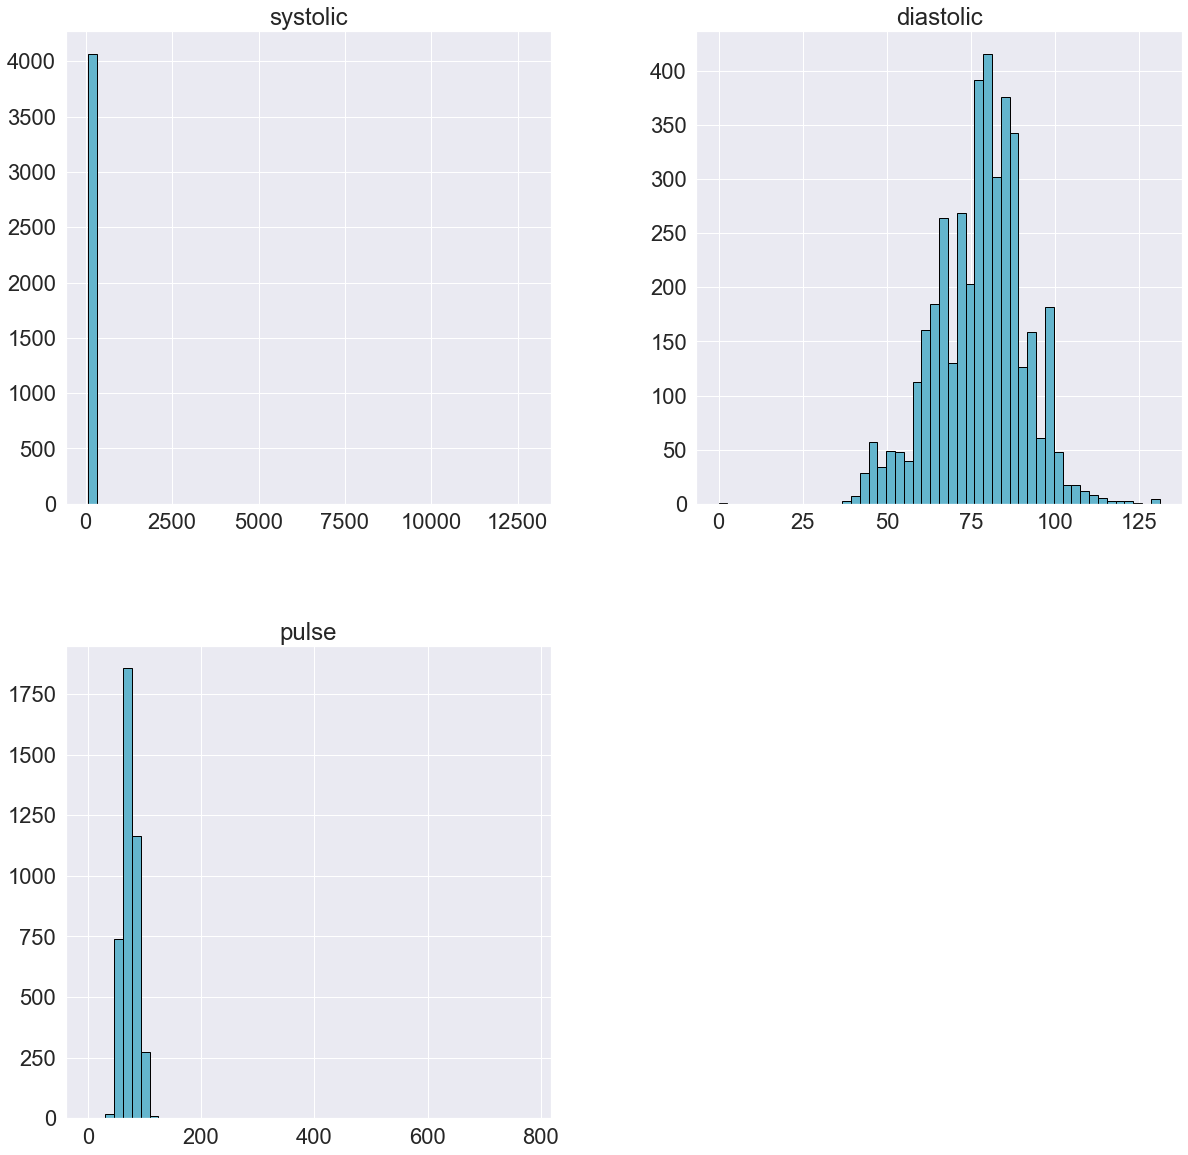

In [27]:
bp[num].hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()

User table

In [28]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   patientID    107 non-null    int64  
 1   firstName    0 non-null      float64
 2   lastName     0 non-null      float64
 3   email        0 non-null      float64
 4   gender       106 non-null    object 
 5   birthday     105 non-null    object 
 6   height       106 non-null    float64
 7   height_unit  107 non-null    object 
 8   weight       106 non-null    float64
 9   weight_unit  107 non-null    object 
 10  marital      48 non-null     object 
 11  smoking      107 non-null    object 
 12  race         52 non-null     object 
 13  life_style   107 non-null    float64
 14  Eduction     51 non-null     object 
 15  age          105 non-null    float64
dtypes: float64(7), int64(1), object(8)
memory usage: 13.5+ KB


In [29]:
user

,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction,age
0,14677,NaN,NaN,NaN,Male,1946-03-21,180.0,cm,80.0,kg,Married,No,Indian,1.200,College/university completed,76.0
1,14645,NaN,NaN,NaN,Female,1966-06-29,155.0,cm,57.0,kg,NaN,No,NaN,0.000,NaN,56.0
2,14614,NaN,NaN,NaN,Female,1974-12-14,161.0,cm,78.5,kg,NaN,No,NaN,0.000,NaN,47.0
3,14593,NaN,NaN,NaN,Male,1985-03-30,168.0,cm,84.0,kg,Single,No,Chinese,1.200,College/university completed,37.0
4,14592,NaN,NaN,NaN,Female,1977-12-10,155.0,cm,57.0,kg,NaN,No,NaN,0.000,NaN,44.0
5,14589,NaN,NaN,NaN,Female,1953-07-11,155.0,cm,43.0,kg,NaN,No,NaN,0.000,NaN,69.0
6,14582,NaN,NaN,NaN,Female,1955-03-22,165.0,cm,86.0,kg,NaN,No,NaN,1.550,NaN,67.0
7,14570,NaN,NaN,NaN,Male,1956-03-19,157.0,cm,100.0,kg,NaN,No,NaN,0.000,NaN,66.0
8,14562,NaN,NaN,NaN,Male,1951-11-16,165.0,cm,80.0,kg,Married,No,Chinese,1.200,Primary school completed,70.0
9,14560,NaN,NaN,NaN,Male,1964-07-01,169.0,cm,82.0,kg,NaN,No,NaN,0.000,NaN,58.0


In [30]:
user['gender'].value_counts()


Male      53
Female    52
Other      1
Name: gender, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


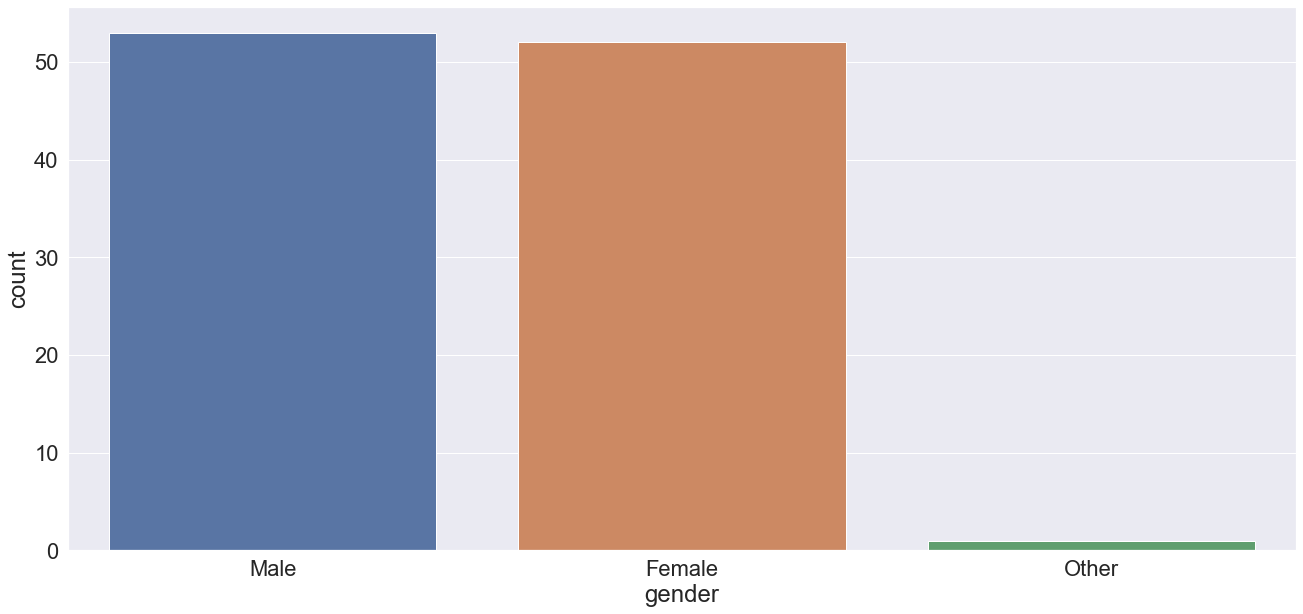

In [31]:
plt.figure(figsize=(22,10))
sns.countplot(user['gender'])
plt.show()

In [32]:
user['marital'].value_counts()


Married     41
Single       6
Divorced     1
Name: marital, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


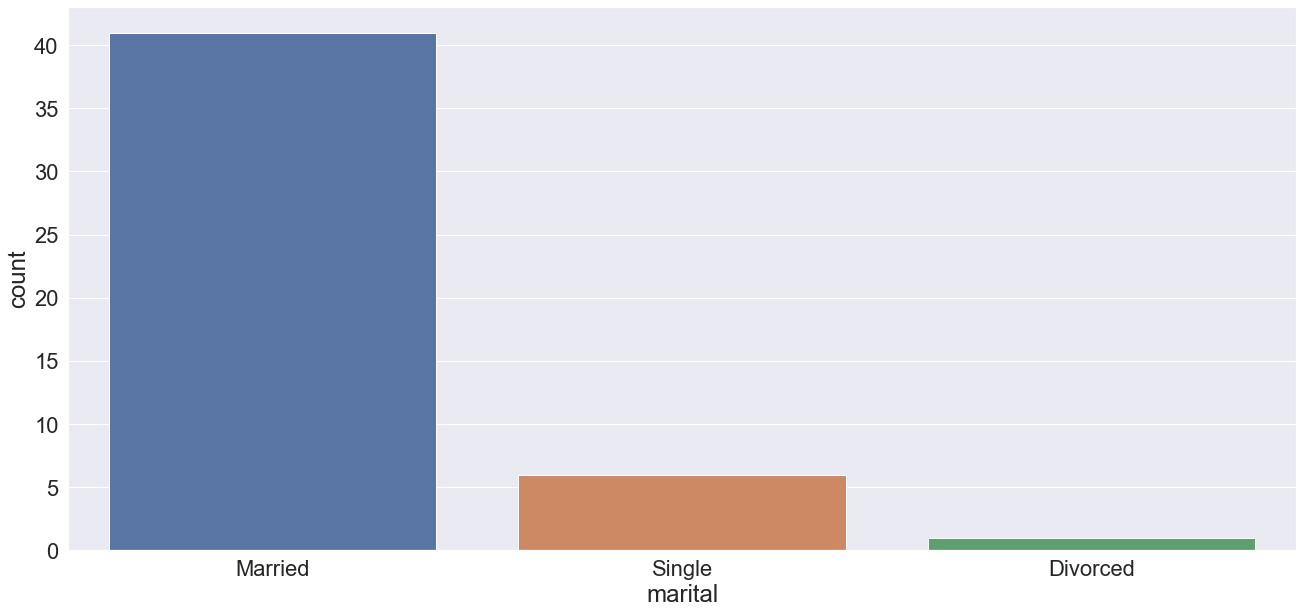

In [33]:
plt.figure(figsize=(22,10))
sns.countplot(user['marital'])
plt.show()

In [34]:
user['smoking'].value_counts()


No     106
Yes      1
Name: smoking, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


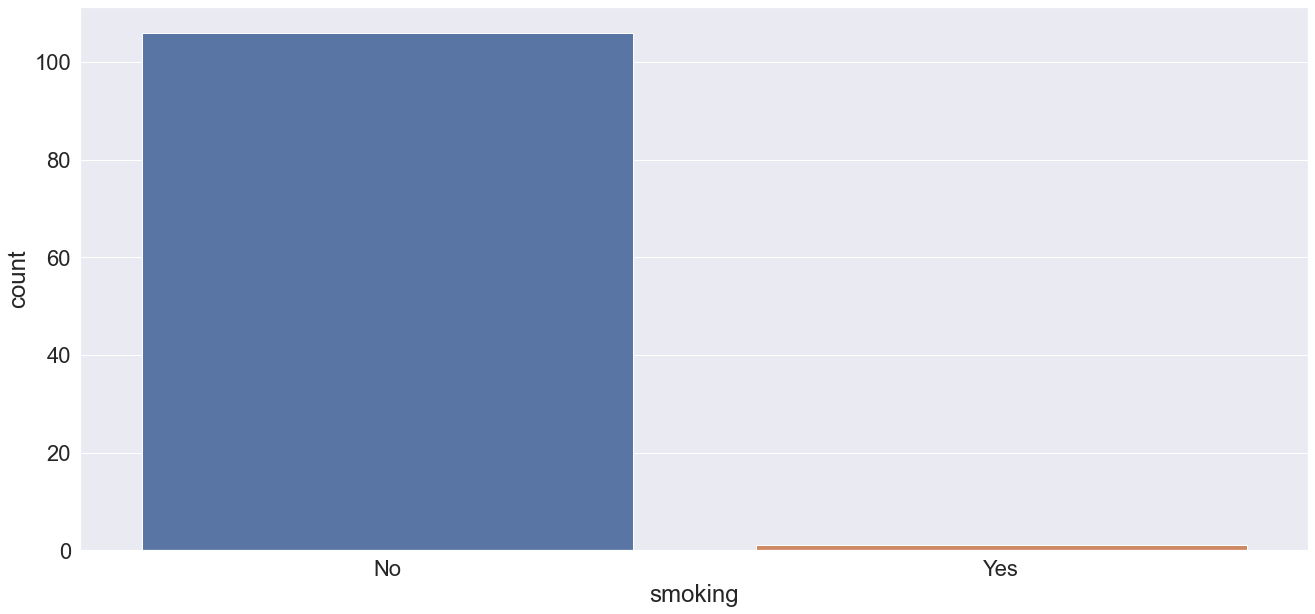

In [35]:
plt.figure(figsize=(22,10))
sns.countplot(user['smoking'])
plt.show()

In [36]:
user['race'].value_counts()


Bumiputera    21
Chinese       19
Indian        11
Other          1
Name: race, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


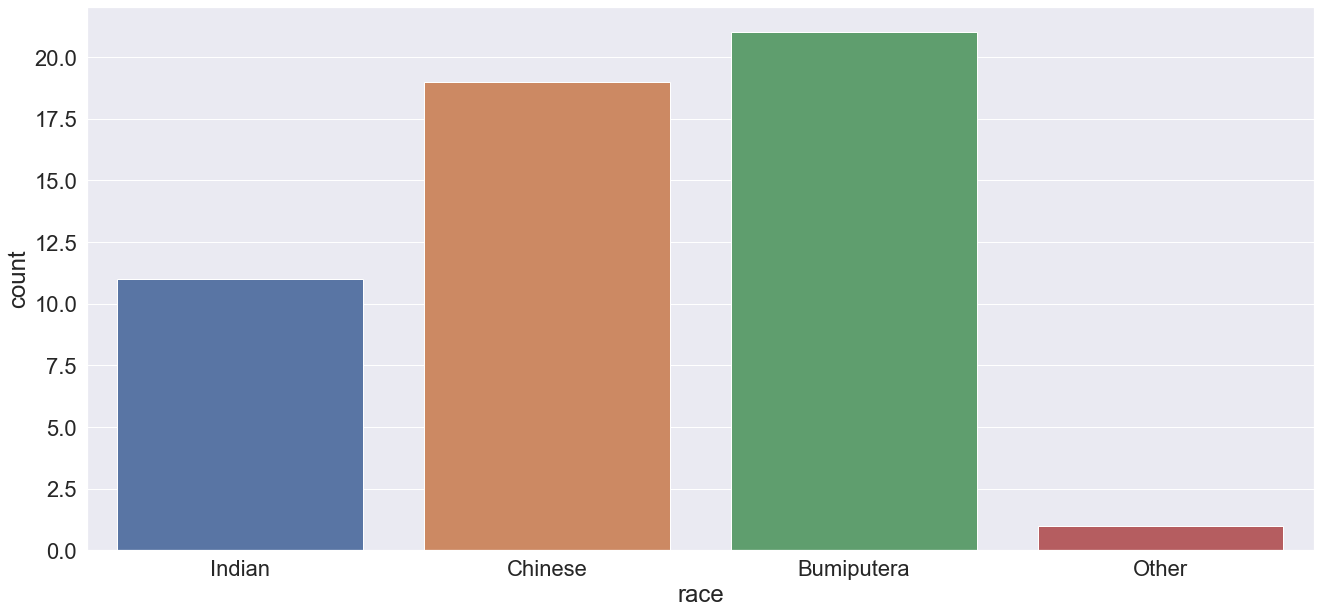

In [37]:
plt.figure(figsize=(22,10))
sns.countplot(user['race'])
plt.show()

In [38]:
user['life_style'].value_counts()


0.000    44
1.200    27
1.550    22
1.375    14
Name: life_style, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


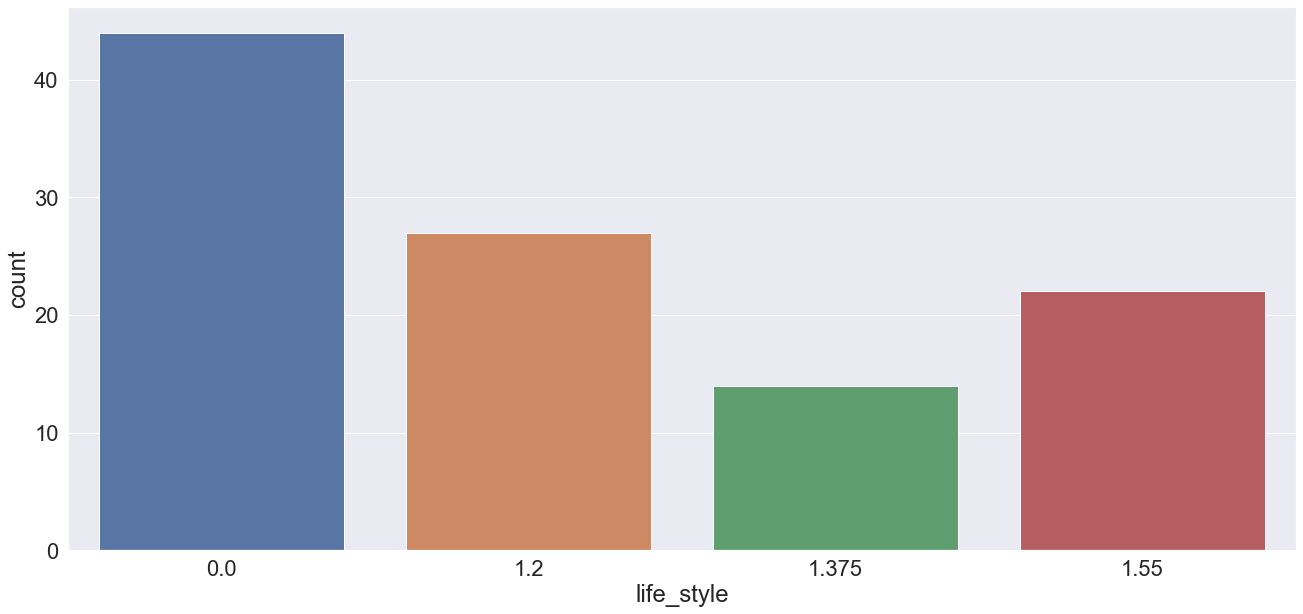

In [39]:
plt.figure(figsize=(22,10))
sns.countplot(user['life_style'])
plt.show()

In [40]:
user['Eduction'].value_counts()


College/university completed       25
Secondary/high school completed    22
Primary school completed            4
Name: Eduction, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


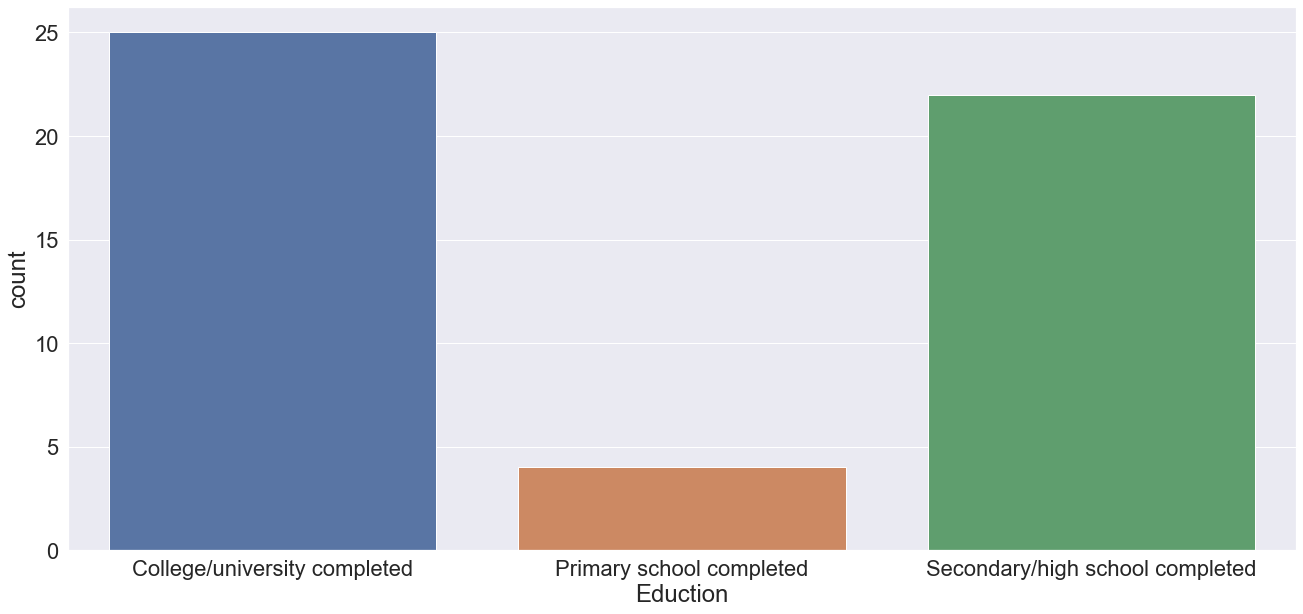

In [41]:
plt.figure(figsize=(22,10))
sns.countplot(user['Eduction'])
plt.show()

Next step is to consider the following addition
-multivariate plots
-multidimensional distribution
-bayesian level of blood pressure
-statistical analysis of each patient
-distribution plots in seaborn

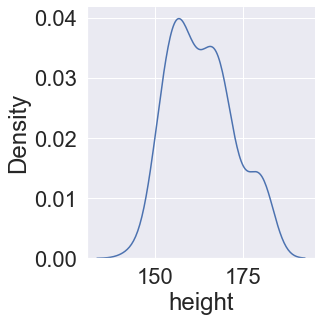

In [42]:
sns.displot(data=user, x=user['height'],kind="kde")


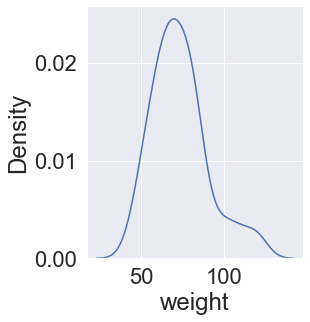

In [43]:
sns.displot(data=user, x=user['weight'],kind="kde")


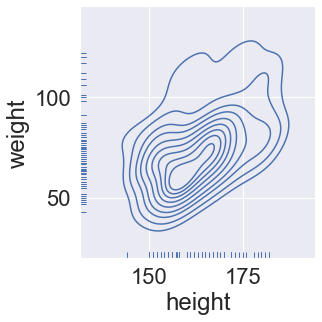

In [44]:
sns.displot(data=user, x=user['height'],y =user['weight'],kind="kde",rug=True)


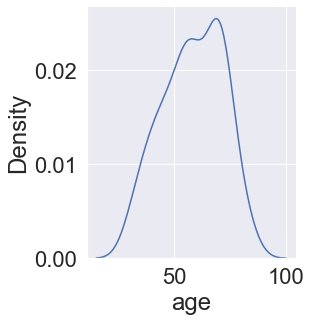

In [45]:
sns.displot(data=user, x=user['age'],kind="kde")

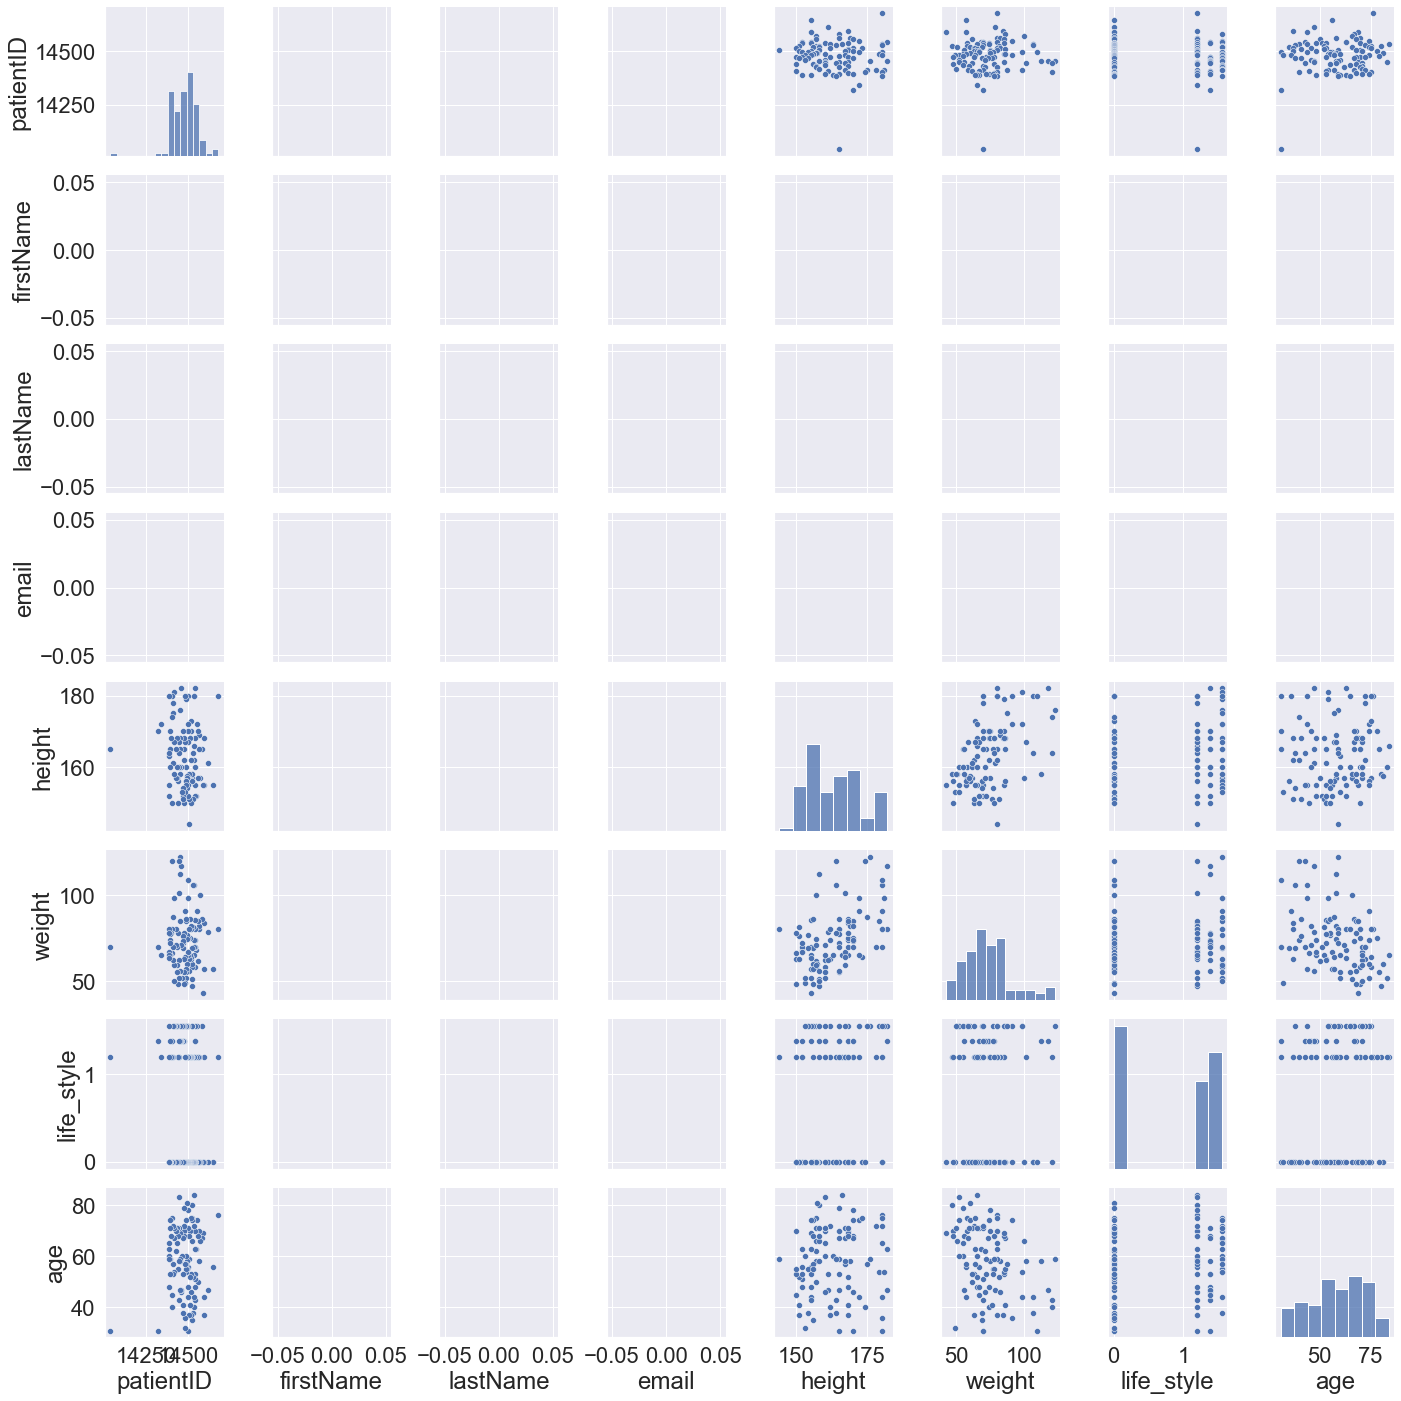

In [46]:
sns.pairplot(user)

In [47]:
df = bp[bp.groupby('patientID')['patientID'].transform('size') > 10]
print (df)

      patientID  systolic  diastolic  pulse          recordTime  \
0         14487       142         77     69 2022-04-26 16:45:00   
1         14536       114         50     55 2022-04-26 06:42:36   
2         14487       138         77     55 2022-04-26 05:40:00   
3         14536       120         54     54 2022-04-25 20:05:53   
4         14487       133         81     84 2022-04-25 17:05:00   
5         14536       114         38     49 2022-04-25 09:58:45   
6         14536       127         44     49 2022-04-25 09:56:19   
7         14536        98         40     54 2022-04-25 06:49:56   
8         14487       128         82     66 2022-04-25 06:00:00   
9         14536       120         52     54 2022-04-24 20:09:43   
10        14487       130         76     64 2022-04-24 16:45:00   
11        14536       123         38     48 2022-04-24 07:46:45   
12        14487       141         84     60 2022-04-24 06:40:00   
13        14536       114         46     52 2022-04-23 20:34:0

In [51]:
user.loc[user['patientID']==14042]

,patientID,firstName,lastName,email,gender,birthday,height,height_unit,weight,weight_unit,marital,smoking,race,life_style,Eduction,age
106,14042,NaN,NaN,NaN,Male,1991-05-16,165.0,cm,70.0,kg,Single,No,Bumiputera,1.2,College/university completed,31.0


In [53]:
user.to_excel(r'C:\Users\User\Documents\GitHub\ClinicalAIDSS\Hypertension\user_cleaned.xlsx', index = False)
